# Assignment – Model Selection

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sb

In [4]:
data=pd.read_csv('titanic_dataset.csv')

In [5]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
data.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Label Encoding

In [10]:
num_data=data.select_dtypes(include=['int64','float64'])
num_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [11]:
cat_data=data.select_dtypes(include=['object'])
cat_data

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [12]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
org_data=data.copy()

In [14]:
le=LabelEncoder()
data['Name']=le.fit_transform(data['Name'])
data['Sex']=le.fit_transform(data['Sex'])
data['Ticket']=le.fit_transform(data['Ticket'])
data['Cabin']=le.fit_transform(data['Cabin'])
data['Embarked']=le.fit_transform(data['Embarked'])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2


# Managing outliers and missing values

In [15]:
freqgraph=data.select_dtypes(include=['float'])

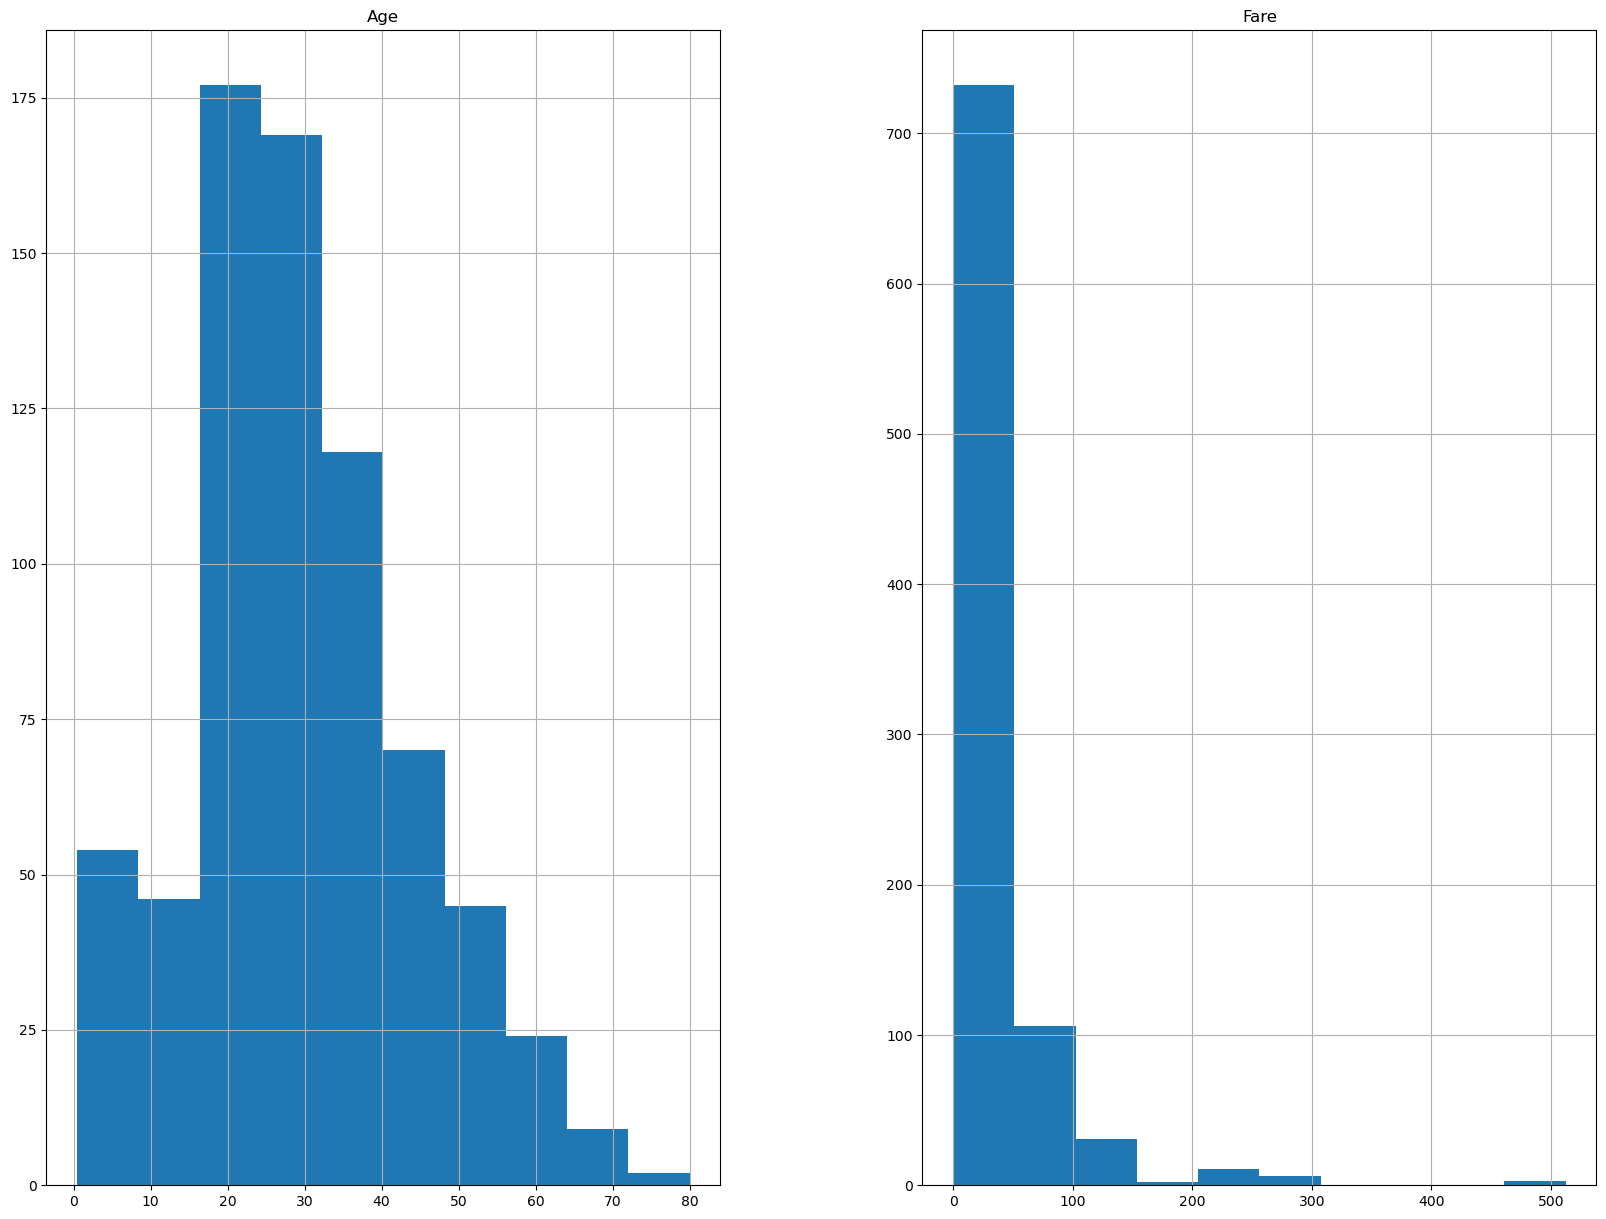

In [16]:
freqgraph.hist(figsize=(20,15))
plt.show()

In [17]:
for col in['Age','Cabin', 'Embarked']:
      data[col]=data[col].fillna(data[col].median())

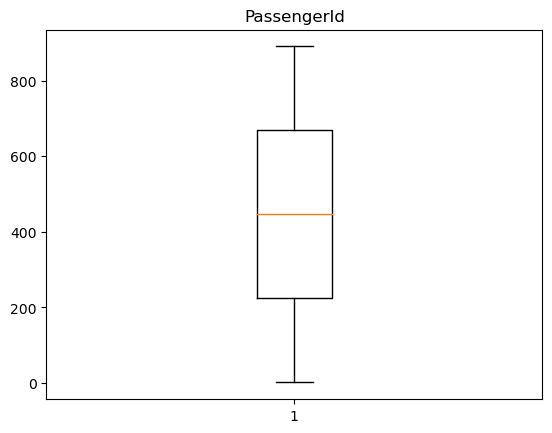

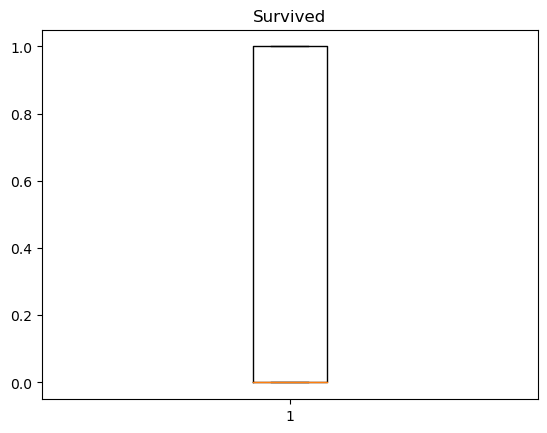

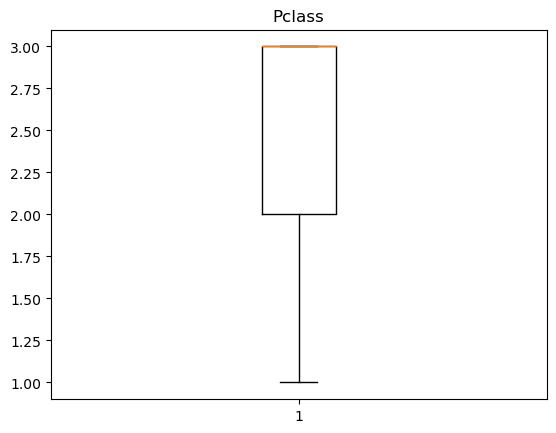

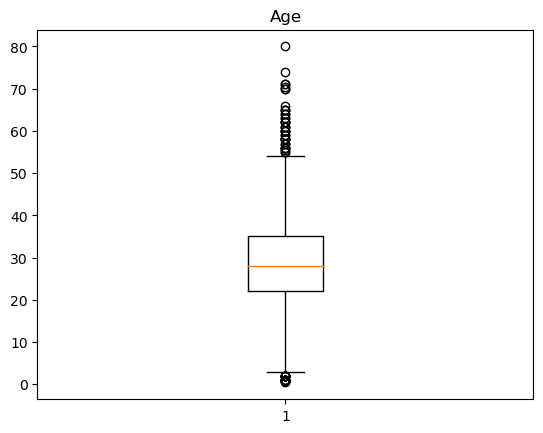

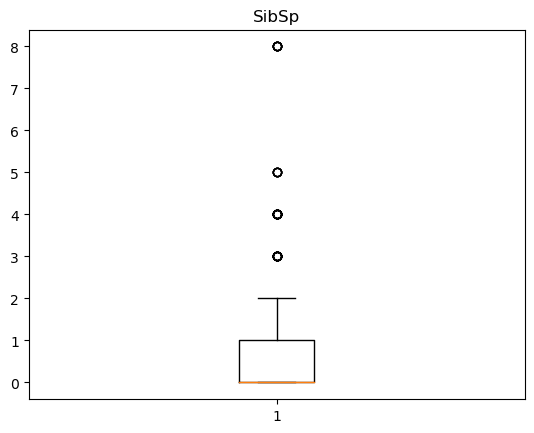

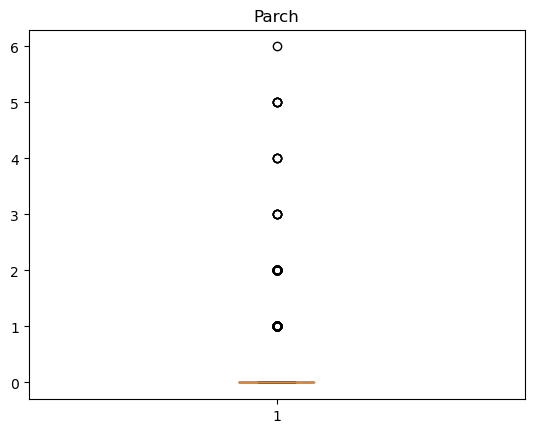

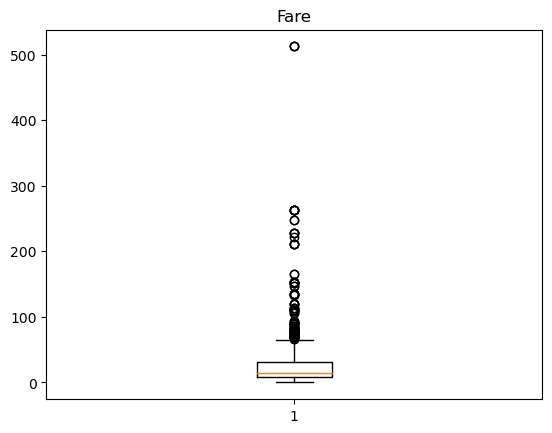

In [18]:
for i in['PassengerId', 'Survived', 'Pclass','Age', 'SibSp','Parch','Fare']:
    plt.figure()
    
    plt.boxplot(data[i])
    plt.title(i)
    

In [19]:
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [20]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

In [21]:
outlier=[]
for x in data['Age']:
    if((x>up_limit) or (x<low_limit)):
     outlier.append(x)

In [27]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [22]:
ind1=data['Age']<low_limit
data.loc[ind1].index

Int64Index([  7,  16,  78, 119, 164, 172, 183, 205, 297, 305, 340, 381, 386,
            469, 479, 530, 642, 644, 755, 788, 803, 824, 827, 831],
           dtype='int64')

In [23]:
ind1=data['Age']>up_limit
data.loc[ind1].index

Int64Index([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],
           dtype='int64')

In [24]:
data.drop([7,  16,  78, 119, 164, 172, 183, 205, 297, 305, 340, 381, 386,
            469, 479, 530, 642, 644, 755, 788, 803, 824, 827, 831,11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],inplace=True)

In [31]:
data.loc[ind1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [25]:
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [26]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

In [27]:
outlier=[]
for x in data['SibSp']:
    if((x>up_limit) or (x<low_limit)):
     outlier.append(x)

In [28]:
outlier

[3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 8,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 3,
 5,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 8,
 4,
 8]

In [29]:
ind1=data['SibSp']<low_limit
data.loc[ind1].index

Int64Index([], dtype='int64')

In [30]:
ind1=data['SibSp']>up_limit
data.loc[ind1].index

Int64Index([ 24,  27,  50,  59,  63,  68,  71,  85,  88, 159, 171, 176, 180,
            182, 201, 229, 233, 261, 266, 278, 324, 341, 374, 409, 480, 485,
            541, 542, 634, 683, 686, 726, 787, 792, 813, 819, 846, 850, 863],
           dtype='int64')

In [31]:
data.drop([24,  27,  50,  59,  63,  68,  71,  85,  88, 159, 171, 176, 180,
            182, 201, 229, 233, 261, 266, 278, 324, 341, 374, 409, 480, 485,
            541, 542, 634, 683, 686, 726, 787, 792, 813, 819, 846, 850, 863],inplace=True)

In [33]:
data.loc[ind1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [34]:
Q1=np.percentile(data['Parch'],25,interpolation='midpoint')
Q2=np.percentile(data['Parch'],50,interpolation='midpoint')
Q3=np.percentile(data['Parch'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
0.0


In [41]:
outlier=[]
for x in data['Parch']:
    if((x>up_limit) or (x<low_limit)):
     outlier.append(x)

In [42]:
outlier

[5, 5, 3, 4, 4, 3, 4, 5, 5, 6, 3, 3, 3, 5]

In [43]:
ind1=data['Parch']<low_limit
data.loc[ind1].index

Int64Index([], dtype='int64')

In [44]:
ind1=data['Parch']>up_limit
data.loc[ind1].index

Int64Index([13, 25, 86, 167, 360, 437, 567, 610, 638, 678, 736, 774, 858, 885], dtype='int64')

In [45]:
data.drop([13, 25, 86, 167, 360, 437, 567, 610, 638, 678, 736, 774, 858, 885],inplace=True)

In [46]:
data.loc[ind1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [47]:
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

7.8958
13.0
27.7208


In [61]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

In [62]:
outlier=[]
for x in data['Fare']:
    if((x>up_limit) or (x<low_limit)):
     outlier.append(x)

In [63]:
outlier

[146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 61.175,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 61.3792,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 247.5208,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 135.6333,
 57.9792,
 153.4625,
 133.65,
 66.6,
 134.5,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 59.4,
 93.5,
 57.9792,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 120.0,
 93.5,
 83.1583,
 89.1042,
 164.8667]

In [64]:
ind1=data['Fare']<low_limit
data.loc[ind1].index

Int64Index([], dtype='int64')

In [65]:
ind1=data['Fare']>up_limit
data.loc[ind1].index

Int64Index([ 31,  34,  52,  61,  62,  72,  92,  97, 102, 118,
            ...
            759, 763, 765, 779, 789, 802, 820, 835, 849, 856],
           dtype='int64', length=101)

In [35]:
data.loc[ind1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [36]:
data.drop(data.loc[ind1].index)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,28.0,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


In [74]:
data.loc[ind1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
120,121,0,2,362,1,21.0,2,0,621,73.5000,147,2
124,125,0,1,857,1,54.0,0,1,417,77.2875,98,2
139,140,0,1,282,1,24.0,0,0,592,79.2000,45,0
151,152,1,1,643,0,22.0,1,0,36,66.6000,61,2
155,156,0,1,866,1,51.0,0,1,595,61.3792,147,0
...,...,...,...,...,...,...,...,...,...,...,...,...
730,731,1,1,14,0,29.0,0,0,141,211.3375,32,2
737,738,1,1,476,1,35.0,0,0,608,512.3292,15,0
741,742,0,1,148,1,36.0,1,0,91,78.8500,67,2
742,743,1,1,711,0,21.0,2,2,602,262.3750,35,0


# Correlation heatmap

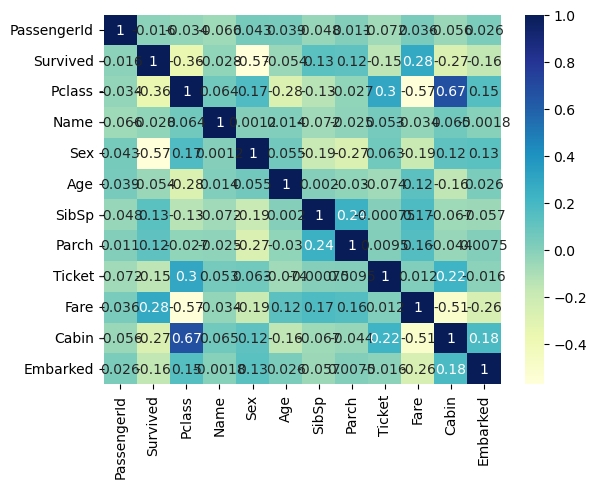

In [37]:
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  

In [38]:
print(data.corr())

             PassengerId  Survived    Pclass      Name       Sex       Age  \
PassengerId     1.000000 -0.015720 -0.034294 -0.066041  0.043285  0.038693   
Survived       -0.015720  1.000000 -0.358050 -0.028135 -0.571867 -0.054410   
Pclass         -0.034294 -0.358050  1.000000  0.063861  0.169100 -0.277711   
Name           -0.066041 -0.028135  0.063861  1.000000  0.001204  0.013808   
Sex             0.043285 -0.571867  0.169100  0.001204  1.000000  0.055479   
Age             0.038693 -0.054410 -0.277711  0.013808  0.055479  1.000000   
SibSp          -0.048432  0.130071 -0.130935 -0.071658 -0.188567  0.001954   
Parch           0.011248  0.120612 -0.026633 -0.025140 -0.273180 -0.029776   
Ticket         -0.072028 -0.148238  0.297041  0.053415  0.063347 -0.073696   
Fare            0.035727  0.284839 -0.565664 -0.033685 -0.192640  0.123505   
Cabin          -0.055948 -0.272748  0.673152  0.064691  0.120017 -0.157432   
Embarked        0.025914 -0.160908  0.149329 -0.001814  0.128505

In [39]:
x=data.drop(['PassengerId','Survived'],axis=1)

In [40]:
y=data['Survived']

# KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
from sklearn.metrics import confusion_matrix,accuracy_score


In [42]:
metric_k=[]
neighbors= np.arange(3,15)

In [43]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier.fit(x_train,y_train)
    y_predictions=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

/Users/hzpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/hzpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

In [44]:
print('Accuracy=',accuracy_score(y_test,y_predictions))

Accuracy= 0.6835443037974683


# SVM

In [45]:
from sklearn.svm import SVC

In [46]:
svm_cls= SVC(kernel= 'linear')
svm_cls= svm_cls.fit(x_train,y_train)
y_pred_svm= svm_cls.predict(x_test)

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [48]:
confusion_matrix(y_test,y_pred_svm)

array([[83, 13],
       [22, 40]])

In [49]:
accuracy_score(y_test,y_pred_svm)

0.7784810126582279

# Hold out technique

# K fold cross validation(svm)

In [50]:
from sklearn.model_selection import KFold
kfold_validator=KFold(10)
for train_index,test_index in kfold_validator.split(x,y):
    print('Training Index:',train_index)
    print('Testing Index:',test_index)

Training Index: [ 79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312
 313 314 315 316 317 318 319 320 32

In [51]:
from sklearn.model_selection import cross_val_score
cv_result= cross_val_score(svm_cls,x,y,cv=kfold_validator)

In [52]:
cv_result

array([0.81012658, 0.78481013, 0.7721519 , 0.86075949, 0.75949367,
       0.81012658, 0.75641026, 0.74358974, 0.87179487, 0.79487179])

In [53]:
np.mean(cv_result)

0.7964135021097047

# Stratified k fold(svm)

In [54]:
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(n_splits= 10)

In [55]:
for train_index,test_index in skfold_validator.split(x,y):
    print('Training Index:',train_index)
    print('Testing Index:',test_index)

Training Index: [ 68  70  79  80  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312
 313 314 315 316 317 318 319 320 32

In [56]:
cv_result= cross_val_score(svm_cls,x,y,cv=skfold_validator)

In [58]:
cv_result

array([0.79746835, 0.7721519 , 0.78481013, 0.87341772, 0.81012658,
       0.75949367, 0.78205128, 0.76923077, 0.83333333, 0.79487179])

In [59]:
np.mean(cv_result)

0.7976955533917559

# K fold of KNN

In [60]:
from sklearn.model_selection import KFold
kfold_validator1=KFold(20)
for train_index,test_index in kfold_validator1.split(x,y):
    print('Training Index:',train_index)
    print('Testing Index:',test_index)

Training Index: [ 40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255
 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273
 274 275 276 277 278 279 280 281 28

In [62]:
from sklearn.model_selection import cross_val_score
cv_result1= cross_val_score(classifier,x,y,cv=kfold_validator)

/Users/hzpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/hzpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

In [63]:
cv_result1

array([0.62025316, 0.62025316, 0.64556962, 0.58227848, 0.62025316,
       0.70886076, 0.70512821, 0.67948718, 0.70512821, 0.71794872])

In [64]:
np.mean(cv_result1)

0.6605160662122687

# Stratified kfold for KNN

In [65]:
from sklearn.model_selection import StratifiedKFold
skfold_validator1=StratifiedKFold(n_splits= 10)

In [66]:
for train_index,test_index in skfold_validator.split(x,y):
    print('Training Index:',train_index)
    print('Testing Index:',test_index)

Training Index: [ 68  70  79  80  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312
 313 314 315 316 317 318 319 320 32

In [67]:
cv_result1= cross_val_score(classifier,x,y,cv=skfold_validator)

/Users/hzpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/hzpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

In [68]:
cv_result1

array([0.64556962, 0.55696203, 0.69620253, 0.63291139, 0.64556962,
       0.6835443 , 0.66666667, 0.70512821, 0.69230769, 0.71794872])

In [69]:
np.mean(cv_result1)

0.6642810775722168

# Conclusion
stratified k fold validation of svm gives best accuracy score